In [1]:
#importing necessary libraries
import requests
import json
import pandas as pd
from matplotlib import pyplot as plt
import datetime
from decouple import config
from collections import Counter 

In [2]:
def data_validation(df):
    #checking if the dataframe is empty
    if df.empty:
        print('Yikes, No songs were downloaded')

    #checking if there are duplicates
    if pd.Series(df['played_at']).is_unique:
        pass
    else:
        raise Exception("Yikes Primary Key check violated")

    #checking for nulls
    if df.isnull().values.any():
        raise Exception("Yike!!! Found Null values")
    
    return True

In [3]:
headers = {
    "Accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": f"Bearer {config('TOKEN')}"
}

In [4]:
#getting today's date
today = datetime.datetime.now()
print("today:",today)

today: 2021-07-06 03:06:20.968925


In [5]:
#getting last month's date
last_month = today - datetime.timedelta(days=300)
print("last_month",last_month)

last_month 2020-09-09 03:06:20.968925


In [6]:
#converting last month's date to unix time stamp
last_month_unix_timestamp = int(last_month.timestamp()) * 1000
print("last_month_Unix",last_month_unix_timestamp)

last_month_replace = last_month.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
print("last_month_Replace:",last_month_replace)

last_month_Unix 1599620780000
last_month_Replace: 2020-09-09 00:00:00


In [7]:
url = f"https://api.spotify.com/v1/me/player/recently-played?after={last_month_unix_timestamp}"
r = requests.get(url, headers = headers)

In [8]:
data = r.json()
data

{'items': [{'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0Y5tJX1MQlPlqiwlOH1tJY'},
       'href': 'https://api.spotify.com/v1/artists/0Y5tJX1MQlPlqiwlOH1tJY',
       'id': '0Y5tJX1MQlPlqiwlOH1tJY',
       'name': 'Travis Scott',
       'type': 'artist',
       'uri': 'spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY'}],
     'available_markets': ['AD',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
      'DJ',
      'DK',
      'DM',
      'DO',
      'DZ',
      'EC',
      'EE',
      'ES',
      'FI',
      'FJ',
      'FM',
      'FR',
  

In [9]:
song_names = []
artist_name = []
played_at_list = []
timestamps = []

for song in data["items"]:
    song_names.append(song['track']['name'])
    artist_name.append(song['track']['album']['artists'][0]['name'])
    played_at_list.append(song['played_at'])
    timestamps.append(song['played_at'][0:10])

In [10]:
songs_dict = {
    "song_names":song_names,
    "artist_name":artist_name,
    "played_at":played_at_list,
    "timestamp":timestamps
}
songs_df = pd.DataFrame(songs_dict)
print(songs_df)

                              song_names   artist_name  \
0                             goosebumps  Travis Scott   
1                 through the late night  Travis Scott   
2                             coordinate  Travis Scott   
3                               way back  Travis Scott   
4                               the ends  Travis Scott   
5                          In the Garden    Jim Reeves   
6                   Teach Me How to Pray    Jim Reeves   
7                        Whispering Hope    Jim Reeves   
8                      Across the Bridge    Jim Reeves   
9                       A Beautiful Life    Jim Reeves   
10                 I'd Rather Have Jesus    Jim Reeves   
11            Where We'll Never Grow Old    Jim Reeves   
12                         I'll Fly Away    Jim Reeves   
13  May the Good Lord Bless and Keep You    Jim Reeves   
14                       The Night Watch    Jim Reeves   
15                       Scarlet Ribbons    Jim Reeves   
16           T

In [11]:
if data_validation(songs_df):
    print("Data Validation Passed!")

Data Validation Passed!


In [12]:
songs_df.shape

(20, 4)

In [13]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_names   20 non-null     object
 1   artist_name  20 non-null     object
 2   played_at    20 non-null     object
 3   timestamp    20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [14]:
songs_df.describe()

,song_names,artist_name,played_at,timestamp
count,20,20,20,20
unique,20,2,20,2
top,A Beautiful Life,Jim Reeves,2021-06-05T06:28:17.567Z,2021-06-05
freq,1,15,1,15


In [15]:
songs_df.head()

,song_names,artist_name,played_at,timestamp
0,goosebumps,Travis Scott,2021-06-06T15:27:17.991Z,2021-06-06
1,through the late night,Travis Scott,2021-06-06T15:12:53.316Z,2021-06-06
2,coordinate,Travis Scott,2021-06-06T15:07:25.009Z,2021-06-06
3,way back,Travis Scott,2021-06-06T15:03:38.695Z,2021-06-06
4,the ends,Travis Scott,2021-06-06T14:58:11.543Z,2021-06-06


In [16]:
songs_df['artist_name'].value_counts()

Jim Reeves      15
Travis Scott     5
Name: artist_name, dtype: int64

<AxesSubplot:>

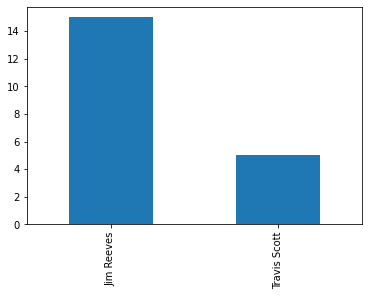

In [17]:
songs_df['artist_name'].value_counts().plot(kind='bar')

## how frequent each song appears

In [18]:
print(Counter(songs_df['song_names'].values))

Counter({'goosebumps': 1, 'through the late night': 1, 'coordinate': 1, 'way back': 1, 'the ends': 1, 'In the Garden': 1, 'Teach Me How to Pray': 1, 'Whispering Hope': 1, 'Across the Bridge': 1, 'A Beautiful Life': 1, "I'd Rather Have Jesus": 1, "Where We'll Never Grow Old": 1, "I'll Fly Away": 1, 'May the Good Lord Bless and Keep You': 1, 'The Night Watch': 1, 'Scarlet Ribbons': 1, 'The Padre of Old San Antone': 1, 'An Evening Prayer - Remastered': 1, 'Precious Memories': 1, 'Take My Hand, Precious Lord': 1})


In [19]:
print(Counter(songs_df['song_names'].values).most_common(5))

[('goosebumps', 1), ('through the late night', 1), ('coordinate', 1), ('way back', 1), ('the ends', 1)]


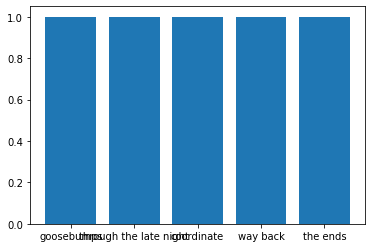

In [20]:
bar_plot = dict(Counter(songs_df['song_names'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()

In [21]:
print(Counter(songs_df['artist_name'].values))

Counter({'Jim Reeves': 15, 'Travis Scott': 5})


In [22]:
print(Counter(songs_df['artist_name'].values).most_common(5))

[('Jim Reeves', 15), ('Travis Scott', 5)]


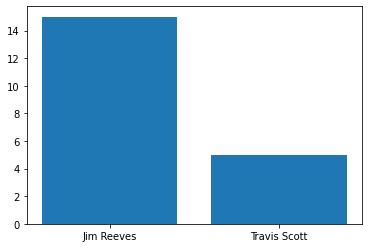

In [23]:
bar_plot = dict(Counter(songs_df['artist_name'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()

In [25]:
songs_df['played_at']=pd.to_datetime(songs_df['played_at'])

songs_df['period'] = (songs_df['played_at'].dt.hour % 24 + 4) // 4
songs_df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [26]:
songs_df

,song_names,artist_name,played_at,timestamp,period
0,goosebumps,Travis Scott,2021-06-06 15:27:17.991000+00:00,2021-06-06,Noon
1,through the late night,Travis Scott,2021-06-06 15:12:53.316000+00:00,2021-06-06,Noon
2,coordinate,Travis Scott,2021-06-06 15:07:25.009000+00:00,2021-06-06,Noon
3,way back,Travis Scott,2021-06-06 15:03:38.695000+00:00,2021-06-06,Noon
4,the ends,Travis Scott,2021-06-06 14:58:11.543000+00:00,2021-06-06,Noon
5,In the Garden,Jim Reeves,2021-06-05 06:33:23.554000+00:00,2021-06-05,Early Morning
6,Teach Me How to Pray,Jim Reeves,2021-06-05 06:33:00.024000+00:00,2021-06-05,Early Morning
7,Whispering Hope,Jim Reeves,2021-06-05 06:31:21.017000+00:00,2021-06-05,Early Morning
8,Across the Bridge,Jim Reeves,2021-06-05 06:28:17.567000+00:00,2021-06-05,Early Morning
9,A Beautiful Life,Jim Reeves,2021-06-05 06:26:10.867000+00:00,2021-06-05,Early Morning


In [27]:
songs_df['period'].value_counts()

Early Morning    15
Noon              5
Name: period, dtype: int64

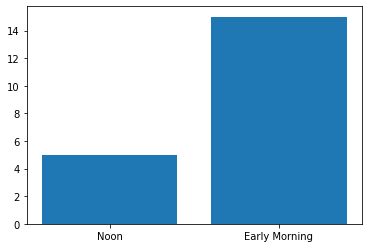

In [29]:
bar_plot = dict(Counter(songs_df['period'].values))
plt.bar(*zip(*bar_plot.items()))
plt.show()